# 神经网络

### 0.引入示例
神经网络是一种机器学习模型，试图模仿自然界中生物神经网络的学习模式，可以简单的理解为它在模拟人类大脑的方式在进行学习。生物神经网络具有相互连接的神经元和接收输入的树突，然后基于这些输入，它们通过轴突产生输出信号到另一个神经元。我们将尝试通过使用人工神经网络（ANN）来模仿这个过程，现在我们称其为神经网络。神经网络是深度学习的基础，接下来我们将从使用python来创建单个神经元。

### 1.概念

    1.1 神经元
神经元具有一个或多个输入，偏置，激活功能和单个输出。神经元接收输入，将它们乘以某个权重，然后将它们传递给激活函数(activation function)以产生输出。常用的激活函数有Sigmoid函数、ReLU函数等。

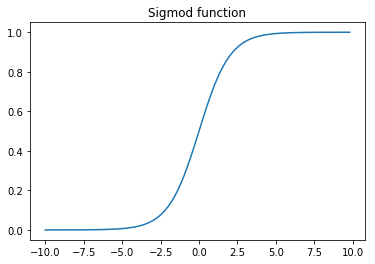

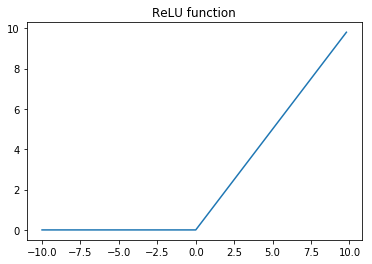

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
 
def sigmoid(x):
    # 直接返回sigmoid函数
    return 1. / (1. + np.exp(-x))
 
def plot_sigmoid():
    # param:起点，终点，间距
    x = np.arange(-10, 10, 0.2)
    y = sigmoid(x)
    plt.title("Sigmod function")
    plt.plot(x, y)
    plt.show()
    
def relu(x):
    s = np.where(x < 0, 0, x)
    return s

def plot_relu():
    # param:起点，终点，间距
    x = np.arange(-10, 10, 0.2)
    y = relu(x)
    plt.title("ReLU function")
    plt.plot(x, y)
    plt.show()

#绘制sigmod函数
plot_sigmoid()
#绘制ReLU函数
plot_relu()

<img src="img/pic_1.PNG" width=400 height=400>

    1.2 参数调整
得到输出后，将它与已知标签进行比较并相应地调整权重（权重通常从随机初始化值开始）。我们不断重复此过程，直到达到允许的最大迭代次数或可接受的错误率。

    1.3 多层感知器模型
为了创建神经网络，我们简单地开始将感知器层添加在一起，创建神经网络的多层感知器模型。您将拥有一个接收数据的输入层和一个将创建结果输出的输出层。其间的任何层都称为隐藏层，因为它们不能直接“看到”您输入的数据或输出的数据。

<img src="img/pic_2.PNG" width=300 height=400>

### 2.代码实现
    2.1 导入相关库文件

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets

    2.2 导入数据集

In [9]:
dataset = datasets.load_wine()
data = dataset.data
# 为了方便演示将数据和标签一起封装成DataFrame
X = pd.DataFrame(data,columns=dataset.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


    2.3 检查数据

In [10]:
"""
count 数量  mean 平均值  std 标准差   min 最小值
25% 第一四分位数,等于该样本中所有数值由小到大排列后第25%的数字。
50% 中位数
75% 同上类似
max 最大值
"""
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [11]:
X.shape

(178, 13)

In [25]:
y=dataset.target
print(np.unique(y))

[0 1 2]


    2.4 将数据集拆分成训练集和测试集

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

    2.5 特征标准化

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

    2.6 训练模型

In [16]:
from sklearn.neural_network import MLPClassifier
"""
    MLPClassifier(BaseMultilayerPerceptron, ClassifierMixin):
        Parameters:
            hidden_layer_sizes : 第i个元素表示第i个隐藏层中的神经元数量。
            activation : 激活函数
            solver : 权重优化的求解器
            alpha : 惩罚（正则化项）参数。
            batch_size： minibatch的大小
            learning_rate：权重更新（学习率）
            learning_rate_init：初始的学习率
            power_t：反缩放学习率的指数。
            max_iter： 最大迭代次数
            shuffle： 每次迭代中对样本进行重洗
            random_state： 随机种子
            tol： 优化的阈值
            verbose：是否打印到stdout。
            warm_start：重用上一次调用的解决方案以适合初始化
            momentum： 梯度下降更新的动量
            nesterovs_momentum：是否使用Nesterov动量
            early_stopping ：当评价没有改善，是否提前终止训练
            validation_fraction：将训练数据留一部分当作早期终止训练的验证集
            beta_1：一阶矩向量的指数衰减率
            beta_2：二阶矩向量的指数衰减率
            epsilon：adam稳定性的价值
        Attributes：
            classes_：每个输出的类标签。
            loss_：使用损失函数计算的当前损失。
            coefs_：列表中的第i个元素表示对应于层i的权重矩阵。
            intercepts_：列表中的第i个元素表示对应于层i+1的偏置。
            n_iter_：迭代次数。
            n_layers_：层数。
            n_outputs_： 输出的个数。
            out_activation_：输出激活函数的名称。
            
"""
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500,random_state=0)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

    2.7 预测结果

In [17]:
y_pred = mlp.predict(X_test)

    2.8 生成混淆矩阵

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 22  1]
 [ 0  1 10]]
